In [5]:
import cv2
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



def plot_digit_arr(img_data):
    shape = img_data.shape[0]
    size = int(shape**0.5)
    img = img_data.reshape(size, size)
    plt.imshow(img, cmap="binary")
    plt.axis("off")

def crop_images(paths):
    i = 0
    img_dir = os.path.join(os.getcwd(), "datasets", "images")
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)
    for path in paths:
        i += 1
        new_img_path = os.path.join(img_dir, "img{}.png".format(i))
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = img_data[0:45, 0:278]
        cv2.imwrite(new_img_path, img)

def split_image_digits(path, out_dir="newer_images"):
    new_dirname = os.path.split(path)[-1].split(".")[0]
    new_dir = os.path.join(os.getcwd(), "datasets", out_dir)
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    new_path = os.path.join(new_dir, new_dirname)
    if not os.path.exists(new_path):
        os.mkdir(new_path)
    img = cv2.imread(path)
    img1 = img[0:44, 0:92]
    img2 = img[0:44, 92:184]
    img3 = img[0:44, 184:276]
    cv2.imwrite(os.path.join(new_path, "image1.png"), img1)
    cv2.imwrite(os.path.join(new_path, "image2.png"), img2)
    cv2.imwrite(os.path.join(new_path, "image3.png"), img3)
    return new_path

def create_image_data(img_dirname):
    new_image_paths = []
    images_dir = os.path.join(os.getcwd(), "datasets", img_dirname)
    paths = [[os.path.join(dn, fn) for fn in files] for dn, _ , files in os.walk(images_dir)]
    paths = sum(paths, [])
    crop_images(paths)
    for path in paths:
        new_path = split_image_digits(path)
        new_image_paths.append(new_path)
    return new_image_paths
    
def preprocess_image_data(image_path, n):
    new_images = [os.path.join(image_path, fn) for fn in os.listdir(image_path)]
    img1 = cv2.imread(new_images[0], cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(new_images[1], cv2.IMREAD_GRAYSCALE)
    img3 = cv2.imread(new_images[2], cv2.IMREAD_GRAYSCALE)
    #imgs = [img1.flatten(), img2.flatten(), img3.flatten()]
    imgs = [img1, img2, img3]
    dfs = {}
    for i in range(len(imgs)):
        img = imgs[i]
        name = "image{}".format((i+1)+n)
        df = img_to_dict(img)
        dfs[name] = df
    return dfs

def img_to_dict(img):
    p = 0
    res = {}
    for i in range(img.shape[0]):
        p += 1
        col = "pixel{}".format(p)
        pix = img[i]
        res[col] = pix
    return res

def images_to_df(img_path, n):
    dfs = preprocess_image_data(img_path, n)
    main_df = pd.DataFrame(dfs.values(), index=dfs.keys())
    return main_df

def save_image_data(imgs_path):
    dfs = []
    n = 0
    for img_name in os.listdir(imgs_path):
        img_path = os.path.join(imgs_path, img_name)
        df = images_to_df(img_path, n)
        dfs.append(df)
        n += 3
    main_df = pd.DataFrame()
    for df in dfs:
        if len(main_df) == 0:
            main_df = df
        else:
            main_df = pd.concat([main_df, df])
    df_save_dir = os.path.join(os.getcwd(), "output")
    if not os.path.exists(df_save_dir):
        os.mkdir(df_save_dir)
    main_df.to_csv(os.path.join(df_save_dir, "image_pixels_{}.csv".format(int(time.time()))))
    return main_df
    
def train_predict_digits(X, y, digit=1):
    X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
    y_train_digit = (y_train == digit)
    y_test_digit = (y_test == digit)
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(X_train, y_train_digit)
    sgd_clf.predict(X_test[0])
    scores = cross_val_score(sgd_clf, X_train, y_train_digit, cv=3, scoring="accuracy")
    return scores

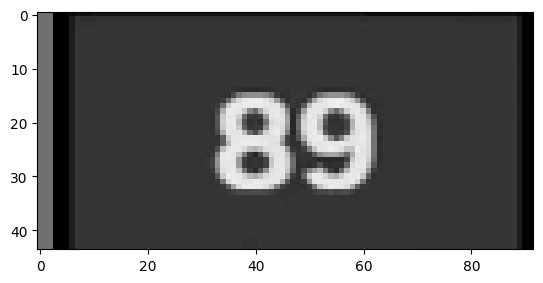

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), "datasets", "images", "img1.png")

new_dirname = os.path.split(path)[-1].split(".")[0]
new_dir = os.path.join(os.getcwd(), "datasets", "newer_images")
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
new_path = os.path.join(new_dir, new_dirname)
if not os.path.exists(new_path):
    os.mkdir(new_path)
img = cv2.imread(path)
img1 = img[0:44, 0:92]
img2 = img[0:44, 92:184]
img3 = img[0:44, 184:276]
# cv2.imwrite(os.path.join(new_path, "image1.png"), img1)
# cv2.imwrite(os.path.join(new_path, "image2.png"), img2)
# cv2.imwrite(os.path.join(new_path, "image3.png"), img3)
plt.imshow(img1)

In [ ]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
 
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
 
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
 
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
 
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
 
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )